Importing the libraries and dataset. Also taking a look at the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

slidings = pd.read_csv('Data\slidings_training.csv')
slidings = slidings.drop(columns='Unnamed: 0',axis=1)
slidings.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain
0,1,1,0,0,0,0,0,0,1,0.60
1,1,1,0,0,0,0,0,0,1,0.60
2,1,1,0,0,0,0,0,0,1,0.13
3,1,1,0,0,0,0,0,0,1,2.17
4,1,1,0,0,0,0,0,0,1,93.60


In [2]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45931 entries, 0 to 45930
Data columns (total 10 columns):
situation         45931 non-null int64
location          45931 non-null int64
risk              45931 non-null int64
victims           45931 non-null int64
deadly_victims    45931 non-null int64
length            45931 non-null int64
num_points        45931 non-null int64
in_place          45931 non-null int64
sliding           45931 non-null int64
Rain              45931 non-null float64
dtypes: float64(1), int64(9)
memory usage: 3.5 MB


Performing a t-SNE analysis on the dataset, and taking a look at the correlations to try to figure out if there is anything else we can do. We will do this considering three situations:
1- Without the zero risk rows and situation feature.
2- Without the zero risk rows.
3- Without the situation feature.
This notebook relates to case number 1.
Considerations will be taken in 12.2.

In [3]:
slidings.situation.value_counts()

0    36574
1     9357
Name: situation, dtype: int64

In [4]:
slidings = slidings[slidings.risk!=0]
slidings.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain
959,0,3,3,0,0,0,0,0,0,19.7
961,0,3,2,0,0,0,0,0,0,88.9
962,0,3,2,0,0,0,0,0,0,0.0
964,0,3,3,0,0,0,0,0,1,4.5
965,0,3,2,0,0,0,0,0,1,0.0


In [5]:
slidings['risk'].value_counts()

3    4715
2    1878
4    1017
1     322
Name: risk, dtype: int64

In [6]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7932 entries, 959 to 45894
Data columns (total 10 columns):
situation         7932 non-null int64
location          7932 non-null int64
risk              7932 non-null int64
victims           7932 non-null int64
deadly_victims    7932 non-null int64
length            7932 non-null int64
num_points        7932 non-null int64
in_place          7932 non-null int64
sliding           7932 non-null int64
Rain              7932 non-null float64
dtypes: float64(1), int64(9)
memory usage: 681.7 KB


In [7]:
slidings.sliding.value_counts()

0    4119
1    3813
Name: sliding, dtype: int64

In [8]:
X = slidings.drop(columns={'sliding','situation'},axis=1)
random_state = 2
X

,location,risk,victims,deadly_victims,length,num_points,in_place,Rain
959,3,3,0,0,0,0,0,19.7
961,3,2,0,0,0,0,0,88.9
962,3,2,0,0,0,0,0,0.0
964,3,3,0,0,0,0,0,4.5
965,3,2,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
45885,117,2,0,0,0,0,0,36.5
45888,117,2,0,0,0,0,0,24.5
45890,117,3,0,0,0,0,0,24.5
45893,117,2,0,0,0,0,0,3.3


In [9]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2,random_state=random_state)
X_TSNE = model.fit_transform(X)

X_TSNE

array([[-13.165803, -36.433617],
       [  9.045856, -28.539156],
       [-28.081827, -34.79517 ],
       ...,
       [ 18.804853,  45.978188],
       [ 45.661175,  29.739077],
       [-37.40311 ,  87.62612 ]], dtype=float32)

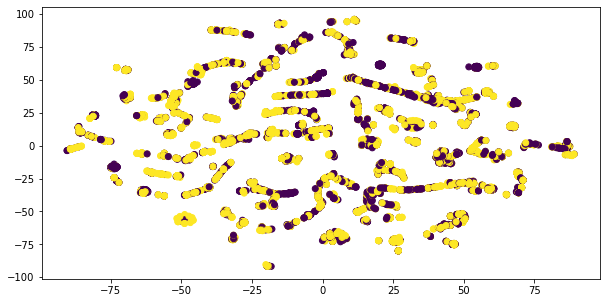

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=slidings.sliding)

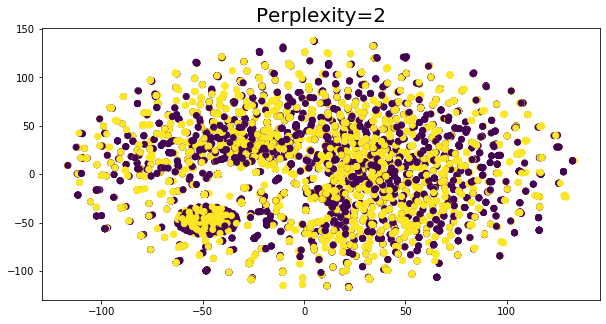

In [15]:
perplexity = 2
model = TSNE(n_components=2,perplexity=perplexity,random_state=random_state)
X_TSNE = model.fit_transform(X)
plt.figure(figsize=(10, 5))
plt.title('Perplexity='+str(perplexity),fontsize=20)
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=slidings.sliding)


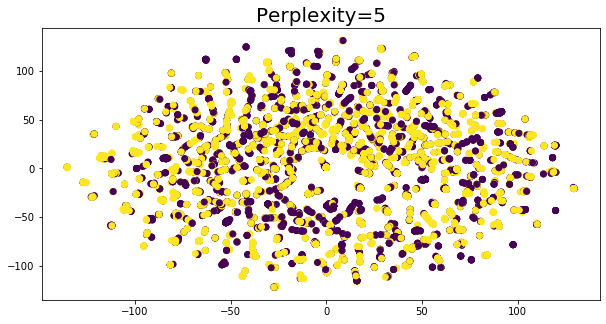

In [16]:
perplexity = 5
model = TSNE(n_components=2,perplexity=perplexity,random_state=random_state)
X_TSNE = model.fit_transform(X)
plt.figure(figsize=(10, 5))
plt.title('Perplexity='+str(perplexity),fontsize=20)
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=slidings.sliding)

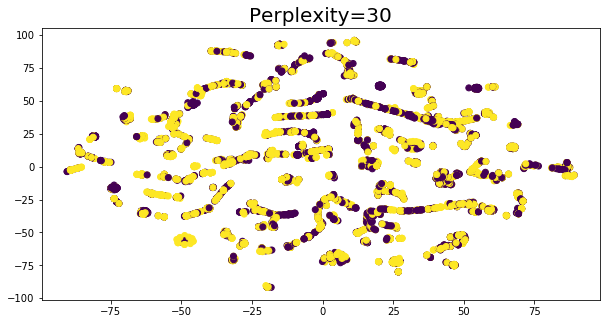

In [17]:
perplexity = 30
model = TSNE(n_components=2,perplexity=perplexity,random_state=random_state)
X_TSNE = model.fit_transform(X)
plt.figure(figsize=(10, 5))
plt.title('Perplexity='+str(perplexity),fontsize=20)
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=slidings.sliding)

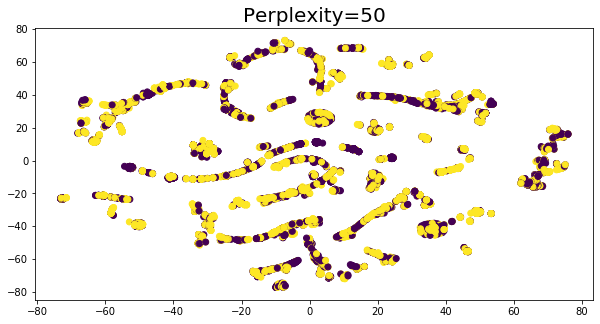

In [18]:
perplexity = 50
model = TSNE(n_components=2,perplexity=perplexity,random_state=random_state)
X_TSNE = model.fit_transform(X)
plt.figure(figsize=(10, 5))
plt.title('Perplexity='+str(perplexity),fontsize=20)
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=slidings.sliding)

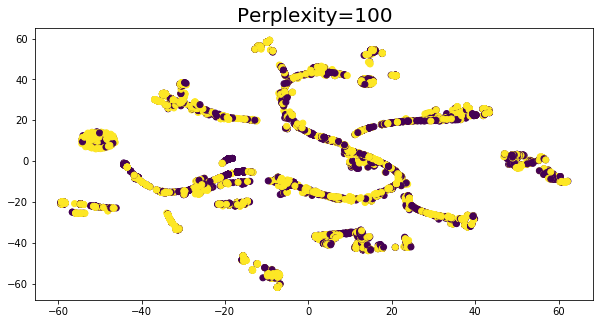

In [19]:
perplexity = 100
model = TSNE(n_components=2,perplexity=perplexity,random_state=random_state)
X_TSNE = model.fit_transform(X)
plt.figure(figsize=(10, 5))
plt.title('Perplexity='+str(perplexity),fontsize=20)
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=slidings.sliding)

<Figure size 864x432 with 0 Axes>

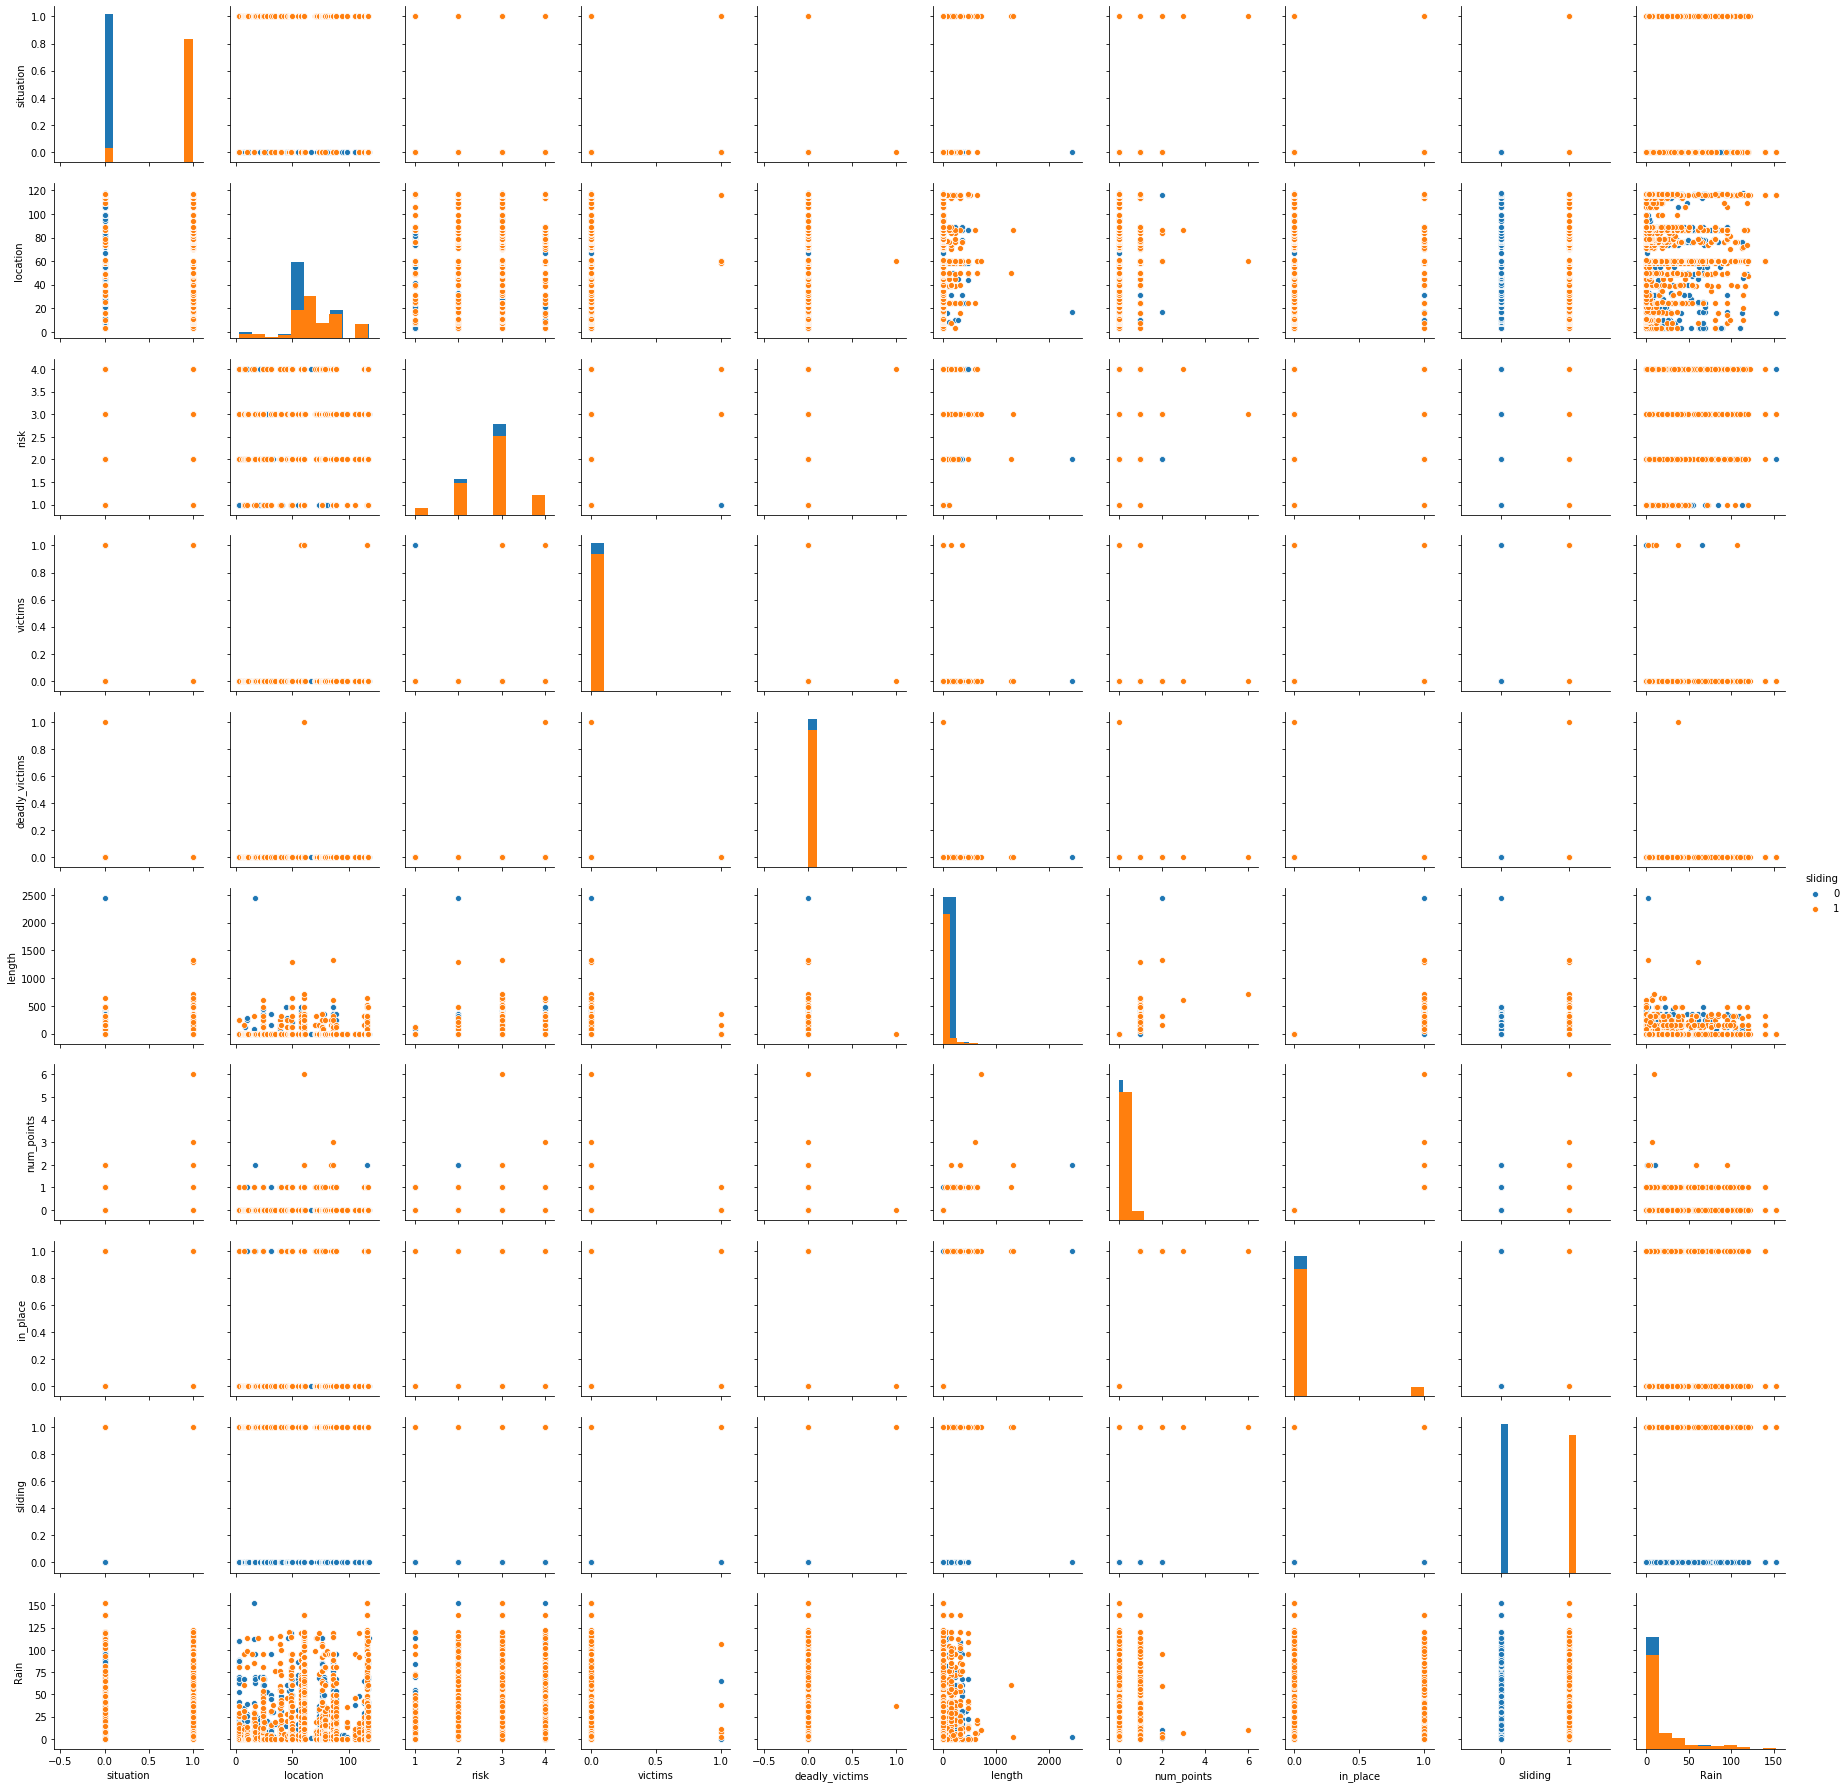

In [29]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.pairplot(slidings, hue='sliding', diag_kind='hist')

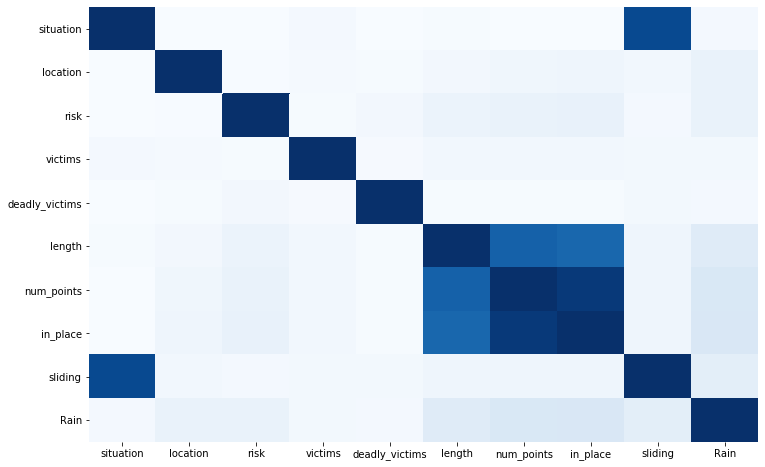

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(slidings.corr(),cbar=False,annot=False,cmap='Blues')